In [163]:
import numpy as np
import random
from collections import defaultdict
import networkx as nx


In [164]:
def random_adjacency_matrix(n,e):   
    A = np.zeros((n,n))
    for i in range(e):
        ed = edge = 0
        while ed == edge:
            ed = np.random.randint(0, high=n-1)
            edge = np.random.randint(0, high=n-1)
        A[ed,edge] = 1
        A[edge,ed] = 1
    return A

In [165]:
def convert(a): 
    adjList = defaultdict(list) 
    for i in range(len(a)): 
        adjList[i] = []
        for j in range(len(a[i])): 
                       if a[i][j]== 1: 
                           adjList[i].append(j) 
    return adjList 

In [166]:
def breadth_first(graph,start,end):
    visited = set()
    to_visit = [start]
    previous = defaultdict(int)
    previous[start]='start'
    while to_visit:
        current = to_visit.pop(0)
        for node in graph[current]:
            if node not in visited:
                to_visit.append(node)
                previous[node]=current
                visited.add(current)
                if node == end:
                    path = []
                    to_trace_back = node
                    while previous.get(to_trace_back) != 'start':
                        path.append(previous[to_trace_back])
                        to_trace_back = previous[to_trace_back]
                        path.reverse()
                    print ("Path found: ", *path,end)
                    visited.add(node)
    #print("Found connected component of length ",len(visited), ": ",visited)            

In [167]:
def depth_first(graph):
    nodes_to_visit = set(range(100))
    components = defaultdict(set)
    counter = 0
    while nodes_to_visit:
        visited = set()
        start = random.choice(tuple(nodes_to_visit))
        visit_next = [start]
        while visit_next:
            current = visit_next.pop()
            nodes_to_visit.discard(current)
            components[counter].add(current)
            for node in graph[current]:
                if node not in visited:
                    visit_next.append(node)
                    visited.add(node)
        counter +=1
    print("Found ",counter, " connected components")
    for key, value in components.items():
        print(key, value)

In [202]:
graph = random_adjacency_matrix(100,200)

In [203]:
graph

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [204]:
list(graph[:3])

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 

In [205]:
graph.shape

(100, 100)

In [206]:
graph_list = convert(graph)


In [207]:
graph_list

defaultdict(list,
            {0: [29, 59, 73, 81],
             1: [32],
             2: [54, 55, 66, 81, 98],
             3: [33, 48, 57, 62, 67, 98],
             4: [78, 82, 97],
             5: [23, 68],
             6: [26, 37, 54, 65, 81, 96],
             7: [70],
             8: [85],
             9: [51, 64, 75],
             10: [22],
             11: [22, 30, 37, 96],
             12: [30, 36, 38, 46, 50, 66],
             13: [45, 59],
             14: [46, 91],
             15: [36],
             16: [53, 56, 67, 95],
             17: [24, 25, 65, 72, 74],
             18: [38, 47, 57, 70],
             19: [21, 51, 60, 69, 70, 92],
             20: [64, 67, 74, 81],
             21: [19, 45, 72],
             22: [10, 11, 53, 58, 85],
             23: [5, 57, 59],
             24: [17, 50, 52, 85],
             25: [17, 28, 30, 58, 98],
             26: [6, 32, 63, 76],
             27: [36, 41, 56, 73],
             28: [25, 29, 39, 40, 64, 78, 89, 98],
             29

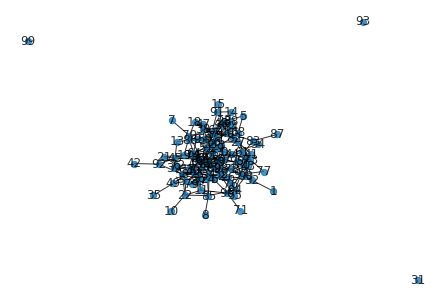

In [208]:
G=nx.from_numpy_matrix(graph)
nx.draw(G, with_labels=True,node_size=40,alpha=0.8)

In [209]:
breadth_first(graph_list,np.random.randint(1,high=100),np.random.randint(1,high=100))

Path found:  45 19 70 21 18


In [210]:
depth_first(graph_list)

Found  4  connected components
0 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 98}
1 {99}
2 {31}
3 {93}
